In [ ]:
from google.colab import drive
drive.mount('/content/drive',force_remount=True)

Mounted at /content/drive


In [ ]:
cd /content/drive/MyDrive/NLP_SamSung

/content/drive/MyDrive/NLP_SamSung


# **Đọc file csv**

In [ ]:
import pandas as pd
df = pd.read_csv("review_phim.csv")

**Label**: Negative và positive

In [ ]:
df

,Unnamed: 0,prediction_ts,age,gender,context,text,label
0,0,1.650092e+09,44,female,movies,"An interesting premise, and Billy Drago is alw...",negative
1,1,1.650093e+09,40,male,movies,Frederick Forsyth's books are always so intric...,negative
2,2,1.650093e+09,36,male,movies,"I can't remember the series, I believe it may ...",positive
3,3,1.650093e+09,20,male,movies,"This movie is so awesome! I loved it, it was r...",positive
4,4,1.650093e+09,21,female,movies,"I can sit through this movie once, but I doubt...",negative
...,...,...,...,...,...,...,...
9911,9911,1.651302e+09,51,male,movies,***SPOILERS*** ***SPOILERS*** Juggernaut is a ...,negative
9912,9912,1.651302e+09,21,male,movies,"This is a truly classic movie in its story, ac...",positive
9913,9913,1.651302e+09,29,male,movies,Watching this was like getting a large mackere...,negative
9914,9914,1.651302e+09,24,male,movies,It is a shame that such a great book was turne...,negative


In [ ]:
#loại bỏ những cột không sử dụng
df = df.drop(columns=['prediction_ts', 'age', 'gender', 'context', 'Unnamed: 0'])

In [ ]:
df

,text,label
0,"An interesting premise, and Billy Drago is alw...",negative
1,Frederick Forsyth's books are always so intric...,negative
2,"I can't remember the series, I believe it may ...",positive
3,"This movie is so awesome! I loved it, it was r...",positive
4,"I can sit through this movie once, but I doubt...",negative
...,...,...
9911,***SPOILERS*** ***SPOILERS*** Juggernaut is a ...,negative
9912,"This is a truly classic movie in its story, ac...",positive
9913,Watching this was like getting a large mackere...,negative
9914,It is a shame that such a great book was turne...,negative


In [ ]:
from sklearn.preprocessing import LabelEncoder

# Tạo một instance của LabelEncoder
label_encoder = LabelEncoder()
df['label'] = label_encoder.fit_transform(df['label'])

In [ ]:
df

,text,label
0,"An interesting premise, and Billy Drago is alw...",0
1,Frederick Forsyth's books are always so intric...,0
2,"I can't remember the series, I believe it may ...",1
3,"This movie is so awesome! I loved it, it was r...",1
4,"I can sit through this movie once, but I doubt...",0
...,...,...
9911,***SPOILERS*** ***SPOILERS*** Juggernaut is a ...,0
9912,"This is a truly classic movie in its story, ac...",1
9913,Watching this was like getting a large mackere...,0
9914,It is a shame that such a great book was turne...,0


In [ ]:
df['text'].iloc[2]

"I can't remember the series, I believe it may have been American Masters, but it was broadcast on PBS around 1980. Most people have some knowledge of the development of the A bomb, and those that have little, or none, probably think it is a pretty dry subject. Anyone who has viewed this 7 part series does not feel that way. You get to know the turmoil in Oppenhemiers mind, and how the development changed his life forever. You understand the tragic figure he became, and why. With 7 episodes you get to know the major players, and the intrigue and backstabbing. I have contacted PBS about the chance of obtaining a video, or DVD, but have never received a response. Too bad, I would love to see it again."

In [ ]:
# kiểm tra trùng lặp
df.duplicated().sum()

0

In [ ]:
# xóa trùng lặp
df = df.drop_duplicates(keep='first')

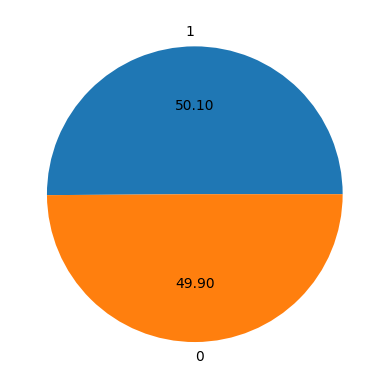

In [ ]:
import matplotlib.pyplot as plt
plt.pie(df['label'].value_counts(), labels=['1','0'],autopct="%0.2f")
plt.show()

#**Xử lí dữ liệu**

Thư viện NLTK - Natural Language Toolkit là một trong những thư viện open-source xử lí ngôn ngữ tự nhiên. Được viết bằng Python và với ưu điểm là dễ dàng sử dụng nên thư viện này ngày càng trở nên phổ biến và có được một cộng đồng lớn mạnh. Thư viện cung cấp hơn 50 kho dữ liệu văn bản khác nhau (corpora) và nhiều chức năng để xử lí dữ liệu văn bản để phục vụ cho nhiều mục đích khác nhau

In [ ]:
import nltk

Hàm word_tokenize này được sử dụng để tách một chuỗi văn bản thành các từ riêng lẻ (token), hay còn gọi là tokenization.

In [ ]:
from nltk.tokenize import word_tokenize
nltk.download('punkt')

[nltk_data] Downloading package punkt to /root/nltk_data...
[nltk_data]   Unzipping tokenizers/punkt.zip.


True

In [ ]:
# Câu văn bản ví dụ
sentence = "Hello, world! This is a test sentence."

# Tokenize câu văn bản
tokens = word_tokenize(sentence)

# In kết quả
print(tokens)

['Hello', ',', 'world', '!', 'This', 'is', 'a', 'test', 'sentence', '.']


Stop words thường là các từ xuất hiện nhiều lần và không đóng góp nhiều vào ý nghĩa của câu, chúng sẽ đóng vai trò như nhiễu, trong tiếng Anh các từ này có thể kể đến như the, is, at, on, which, in, some, many hay trong tiếng Việt là các từ cái, các, cả,.... Các từ này thường sẽ được loại bỏ để giảm kích thước của bộ từ vựng. Trong thư viện NLTK có định nghĩa các stop words phổ biến trong tiếng Anh, tuy nhiên tùy thuộc vào mục đích, bài toàn mà ta sẽ thêm bớt các stop word cho phù hợp.

In [ ]:
from nltk.corpus import stopwords
nltk.download('stopwords')
stopwords_list = stopwords.words('english')
print(stopwords_list)

['i', 'me', 'my', 'myself', 'we', 'our', 'ours', 'ourselves', 'you', "you're", "you've", "you'll", "you'd", 'your', 'yours', 'yourself', 'yourselves', 'he', 'him', 'his', 'himself', 'she', "she's", 'her', 'hers', 'herself', 'it', "it's", 'its', 'itself', 'they', 'them', 'their', 'theirs', 'themselves', 'what', 'which', 'who', 'whom', 'this', 'that', "that'll", 'these', 'those', 'am', 'is', 'are', 'was', 'were', 'be', 'been', 'being', 'have', 'has', 'had', 'having', 'do', 'does', 'did', 'doing', 'a', 'an', 'the', 'and', 'but', 'if', 'or', 'because', 'as', 'until', 'while', 'of', 'at', 'by', 'for', 'with', 'about', 'against', 'between', 'into', 'through', 'during', 'before', 'after', 'above', 'below', 'to', 'from', 'up', 'down', 'in', 'out', 'on', 'off', 'over', 'under', 'again', 'further', 'then', 'once', 'here', 'there', 'when', 'where', 'why', 'how', 'all', 'any', 'both', 'each', 'few', 'more', 'most', 'other', 'some', 'such', 'no', 'nor', 'not', 'only', 'own', 'same', 'so', 'than', '

[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Unzipping corpora/stopwords.zip.


In [ ]:
# Câu văn bản ví dụ
sentence = "This is a sample sentence, showing off the stop words filtration."

# Tokenize câu văn bản
words = word_tokenize(sentence)

# Loại bỏ stopwords
filtered_sentence = [word for word in words if word.lower() not in stopwords_list]

# In kết quả
print("Original Sentence:", " ".join(words))
print("Filtered Sentence:", " ".join(filtered_sentence))


Original Sentence: This is a sample sentence , showing off the stop words filtration .
Filtered Sentence: sample sentence , showing stop words filtration .


Lemmatization là loại bỏ phần đuôi của từ để thu được gốc từ (ví dụ moved sau khi lemmatize sẽ thu được move). Trong thư viện NLTK sẽ sử dụng từ điển Wordnet để map theo các quy tắc (theo tính chất của từ, từ là danh từ, động từ, trạng từ hay tính từ). Sử dụng part-of-speech tagging (nltk.pos_tag) để thu được các tính chất của từ.



In [ ]:
from nltk.stem import WordNetLemmatizer
from nltk.corpus import wordnet
nltk.download('wordnet')
nltk.download('averaged_perceptron_tagger')
# Định nghĩa bộ từ điển ánh xạ các phần của từ loại sang WordNet
wordnet_map = {"N": wordnet.NOUN, "V": wordnet.VERB, "J": wordnet.ADJ, "R": wordnet.ADV}

# Khởi tạo lemmatizer
lemmatizer = WordNetLemmatizer()

# Ví dụ danh sách các câu
sentence_list = [
    "The striped bats are hanging on their feet for best",
    "He is running and reading books",
    "The children are playing in the garden",
]

lemmatized_sentence_list = []

# Lemmatize các câu
for sentence in sentence_list:
    # POS tagging cho từng từ trong câu
    pos_tagged_sentence = nltk.pos_tag(nltk.word_tokenize(sentence))

    # Lemmatize từng từ trong câu dựa trên POS tag
    lemmatized_sentence = " ".join(
        [lemmatizer.lemmatize(word, wordnet_map.get(pos[0].upper(), wordnet.NOUN)) for word, pos in pos_tagged_sentence]
    )

    lemmatized_sentence_list.append(lemmatized_sentence)

# In kết quả
print("Original Sentences:")
print(sentence_list)
print("\nLemmatized Sentences:")
print(lemmatized_sentence_list)


[nltk_data] Downloading package wordnet to /root/nltk_data...
[nltk_data] Downloading package averaged_perceptron_tagger to
[nltk_data]     /root/nltk_data...
[nltk_data]   Unzipping taggers/averaged_perceptron_tagger.zip.


Original Sentences:
['The striped bats are hanging on their feet for best', 'He is running and reading books', 'The children are playing in the garden']

Lemmatized Sentences:
['The striped bat be hang on their foot for best', 'He be run and read book', 'The child be play in the garden']


In [ ]:
nltk.pos_tag(nltk.word_tokenize("He is running and reading books"))

[('He', 'PRP'),
 ('is', 'VBZ'),
 ('running', 'VBG'),
 ('and', 'CC'),
 ('reading', 'VBG'),
 ('books', 'NNS')]

In [ ]:
import re,string
def remove_hyperlink(word):
    return  re.sub(r"http\S+", "", word)


def to_lower(word):
    result = word.lower()
    return result

def remove_number(word):
    result = re.sub(r'\d+', '', word)
    return result

def remove_punctuation(word): #bỏ dấu câu
    result = word.translate(str.maketrans(dict.fromkeys(string.punctuation)))
    return result


def remove_whitespace(word):
    result = word.strip()
    return result

def replace_newline(word):
    return word.replace('\n','')


def remove_extra_whitespace(word):
    return ' '.join(word.split())

def remove_stopwords(word):
    stop_words = set(stopwords.words('english'))
    filtered_word = [w for w in word.split() if not w in stop_words]
    return " ".join(filtered_word)

def lematizer_text(text):
    lemmatizer = WordNetLemmatizer()
    wordnet_map = {"N": wordnet.NOUN, "V": wordnet.VERB, "J": wordnet.ADJ, "R": wordnet.ADV}
    pos_tagged_text = nltk.pos_tag(nltk.word_tokenize(text))
    return " ".join(
        [lemmatizer.lemmatize(word, wordnet_map.get(pos[0].upper(), wordnet.NOUN)) for word, pos in pos_tagged_text]
    )


def remove_emoji(text):
    emoji_pattern = re.compile("["
                               u"\U0001F600-\U0001F64F"  # emoticons
                               u"\U0001F300-\U0001F5FF"  # symbols & pictographs
                               u"\U0001F680-\U0001F6FF"  # transport & map symbols
                               u"\U0001F1E0-\U0001F1FF"  # flags (iOS)
                               u"\U00002702-\U000027B0"
                               u"\U000024C2-\U0001F251"
                               "]+", flags=re.UNICODE)
    return emoji_pattern.sub(r'', text)

def clean_up_pipeline(sentence):
    cleaning_utils = [remove_hyperlink,
                      replace_newline,
                      to_lower,
                      remove_number,
                      remove_punctuation,remove_whitespace,
                      remove_stopwords,
                      lematizer_text,
                      remove_extra_whitespace,
                      remove_emoji]
    for o in cleaning_utils:
        sentence = o(sentence)
    return sentence

In [ ]:
x = df['text'].apply(clean_up_pipeline)
y = df['label']

In [ ]:
x[2]

'cant remember series believe may american master broadcast pbs around people knowledge development bomb little none probably think pretty dry subject anyone view part series feel way get know turmoil oppenhemiers mind development change life forever understand tragic figure become episodes get know major player intrigue backstabbing contact pbs chance obtain video dvd never receive response bad would love see'

**TF-IDF**

TF-IDF nó là viết tắt của từ Term frequency invert document frequency.Nó là một kỹ thuật feature extraction dùng trong text mining và information retrieval.

Tf-idf bao gồm 2 thành phần là tf(term frequency) và idf(inverse document frequency).

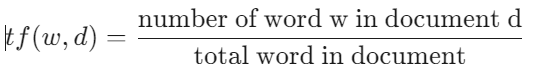

tf đo lường tỉ trọng tần suất từ w có trong document d.Vì document thường có lenght khác nhau nên để normalization ta chia nó cho number word trong document d.

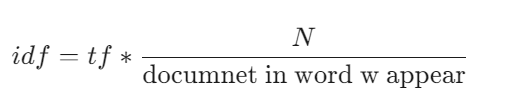

N là tổng số document trong dataset.Tỉ số ​được xem là inverse document frequency. Nếu một từ xuất hiện nhiều ở các document thì tỉ số này sẽ gần 1.Và ngược lại một từ ít xuất hiện hơn tỉ số này sẽ cao hơn 1. Điều này giúp giảm tỉ trọng của những từ thường xuyên suất hiện và tăng tỉ trọng những từ ít xuất hiện trong document hơn (lưu ý N luôn lớn hơn hoặc bằng documnet in word w appear). Một vấn đề là khi N rất lớn mà documnet in word w appear rất nhỏ thì tỉ số này rất lơn cho nên là người dùng log transform để giảm giá trị tỉ số tránh gây khó khăn trong việc tính toán ( lưu ý log nó làm giảm giá trị theo cấp lũy thừa). Khi đó công thức idf cuối cùng sẽ là :

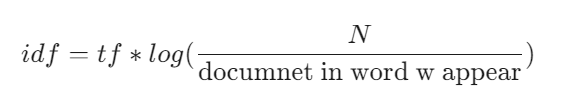

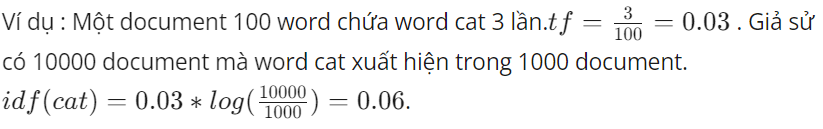

In [ ]:
from sklearn.feature_extraction.text import TfidfVectorizer
documents = [
    "Học máy là một lĩnh vực trong trí tuệ nhân tạo",
    "Trí tuệ nhân tạo có nhiều ứng dụng trong học máy",
    "Lập trình Python là cần thiết cho học máy và trí tuệ nhân tạo"
]
vectorizer = TfidfVectorizer()

# Chuyển đổi tài liệu thành ma trận TF-IDF
tfidf_matrix = vectorizer.fit_transform(documents)
for i in range(len(documents)):
    print(documents[i])
    print(tfidf_matrix.toarray()[i])
    print("----------")

Học máy là một lĩnh vực trong trí tuệ nhân tạo
[0.         0.         0.         0.         0.23625092 0.30421607
 0.40000758 0.         0.23625092 0.40000758 0.         0.23625092
 0.         0.         0.30421607 0.         0.23625092 0.23625092
 0.23625092 0.         0.40000758 0.        ]
----------
Trí tuệ nhân tạo có nhiều ứng dụng trong học máy
[0.         0.38716197 0.         0.38716197 0.22866409 0.
 0.         0.         0.22866409 0.         0.38716197 0.22866409
 0.         0.         0.29444666 0.         0.22866409 0.22866409
 0.22866409 0.         0.         0.38716197]
----------
Lập trình Python là cần thiết cho học máy và trí tuệ nhân tạo
[0.32155565 0.         0.32155565 0.         0.18991594 0.24455136
 0.         0.32155565 0.18991594 0.         0.         0.18991594
 0.32155565 0.32155565 0.         0.32155565 0.18991594 0.18991594
 0.18991594 0.32155565 0.         0.        ]
----------


In [ ]:
tf = TfidfVectorizer()
tf.fit(x)
X_fit = tf.transform(x)

In [ ]:
from sklearn.model_selection import train_test_split
X_train,X_test,y_train,y_test = train_test_split(X_fit,y,test_size=0.3,random_state=48,shuffle=True)


In [ ]:
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import classification_report
model = LogisticRegression()
model.fit(X_train,y_train)
y_pre = model.predict(X_test)
print(classification_report(y_test,y_pre))

              precision    recall  f1-score   support

           0       0.88      0.84      0.86      1472
           1       0.85      0.89      0.87      1503

    accuracy                           0.86      2975
   macro avg       0.86      0.86      0.86      2975
weighted avg       0.86      0.86      0.86      2975



In [ ]:
model.predict(tf.transform([clean_up_pipeline(input())]))

at about 95 minutes , treasure planet maintains a brisk pace as it races through the familiar story . however , it lacks grandeur and that epic quality often associated with stevenson's tale as well as with earlier disney efforts .


array([1])

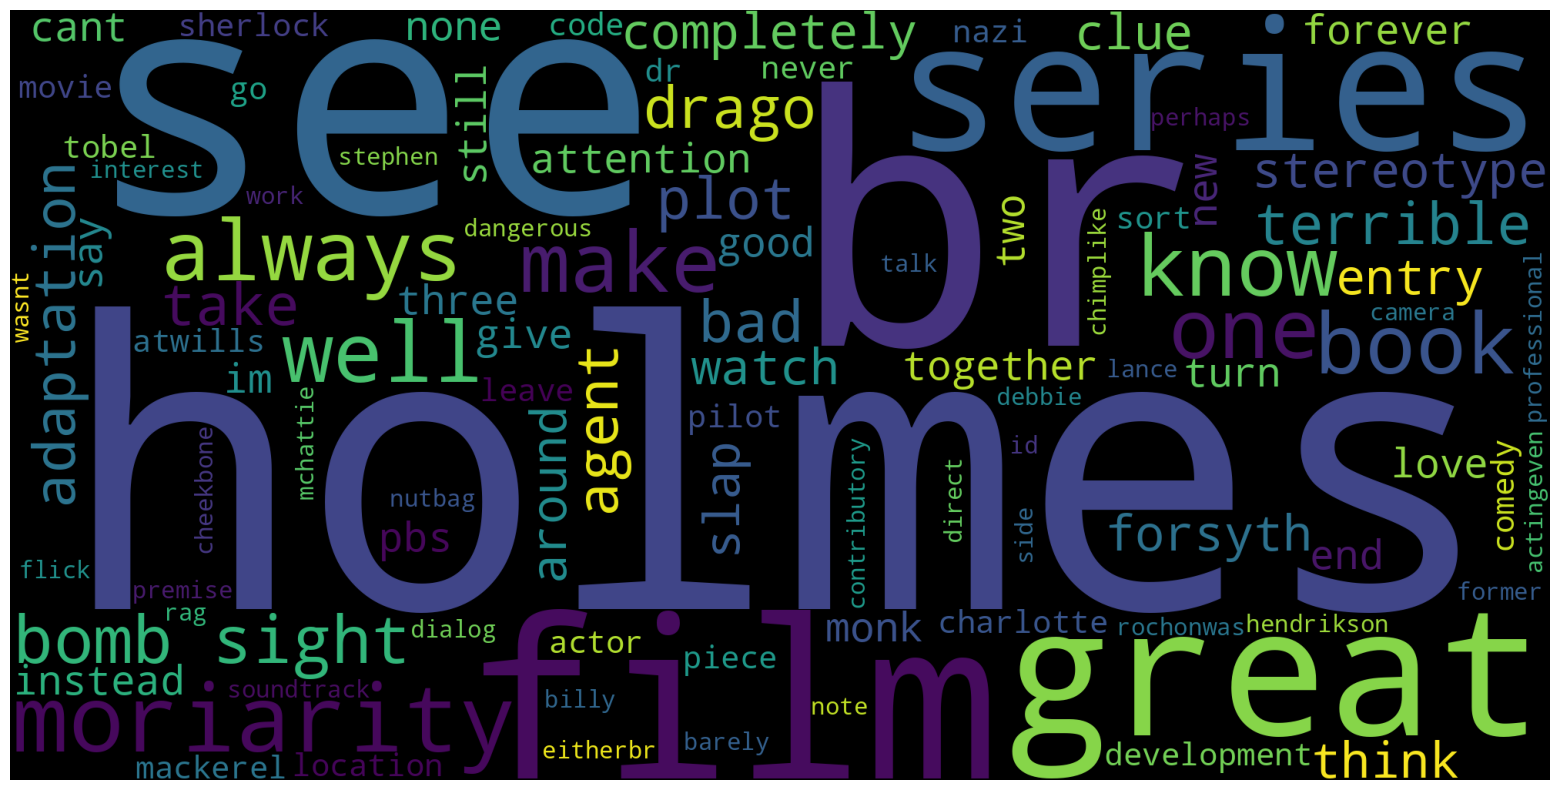

In [ ]:
import wordcloud
import matplotlib.pyplot as plt
import numpy as np
%matplotlib inline
cloud = np.array(x).flatten()
plt.figure(figsize=(20,10))
word_cloud = wordcloud.WordCloud(max_words=100,background_color ="black",
                               width=2000,height=1000,mode="RGB").generate(str(cloud))
plt.axis("off")
plt.imshow(word_cloud)

